# Lab 5.6a

Goals:
 
* Produce visualizations of two-variable functions using a color map.
* Draw vectors on an axis.
* Use gradient ascent to find local maximums.
* Discover the relationship between starting points, parameters, and the output of gradient ascent.





Libraries!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

You'll be working with a function whose maximums and minimums are harder to solve for numerically.  Pick one of the functions below to work with.  You should pick a different function than your groupmates.

In [4]:
def f1(x,y):
  return np.sin(x)+np.sin(2*x+y)

def f2(x,y):
  return np.cos(x)+np.sin(x-2*y)

def f3(x,y):
  return np.sin(x)+np.cos(3*x+y)

def f4(x,y):
  return np.cos(y)+np.sin(x+3*y)

def f5(x,y):
  return np.cos(x)+np.sin(2*x+y)


# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1

* Produce a nice colormapped diagram of your function on the domain $-6\leq x\leq 6$ and $-4\leq y\leq 4$.  Make sure you label your diagram, and correctly scale and orient your axes.

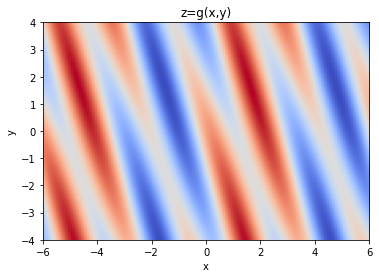

In [41]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)

def f3(x,y):
  return np.sin(x)+np.cos(3*x+y)


ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
z=f3(x,y)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q2

* Define a function `df(x,y)` that returns the gradient vector of your function at `(x,y)`.  
* Copy your `ascent()` function from the prelab.
* Pick a point not especially close to a local maximum as an initial guess. 
* Produce a visualization of a gradient ascent that approaches a local maximum.  You will need to experiment with `alpha` and `n` to get a nice ascent. 
* If your gradient ascent heads outside the graph, feel free to adjust the domain you show.


In [48]:
xvalues=np.arange(0,5,0.1)
yvalues=np.arange(0,5,0.1)
x,y=np.meshgrid(xvalues,yvalues)

def dg(x,y):
  return ((np.cos(x)+(-3)*np.sin(3*x+y)),(-1)*np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x,y=x+alpha*dg(x,y)[0],y+alpha*dg(x,y)[1]
  return (x,y)

ax=plt.axes(xlim=[0,5], ylim=[0,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
z=f3(x,y)
ascent(1,.5,dg,0.1,100)

ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-6,))

## Q3

* What downsides are there to using too small an $\alpha$?  Explain in a couple sentences and illustrate with an example.
* What downsides are there to using too large an $\alpha$?  Explain in a couple sentences and illustrate with an example.


The downsides for using a too small alpha is that the vectors are too short and even though the vectors may be moving in the right direction to reach the local maximum they may not actually reach the maximum value.

The downsides for using a too large alpha is that the vectors will be too long, which makes them move too much. There will be many vectors trying to reach the maximum, and it will be difficult to see where the maximum value is approaching because the vectors are moving too much and are overlapping each other.

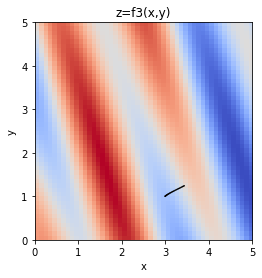

In [27]:
#Too small of an alpha
xvalues=np.arange(0,5,0.1)
yvalues=np.arange(0,5,0.1)

def dg(x,y):
  return ((np.cos(x)+(-3)*np.sin(3*x+y)),(-1)*np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x,y=x+alpha*dg(x,y)[0],y+alpha*dg(x,y)[1]
    
  return (x,y)

ax=plt.axes(xlim=[0,5], ylim=[0,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ascent(3,1,dg,0.01,30)

ax.imshow(z, cmap='coolwarm', origin='lower', extent=(0,5,0,5))

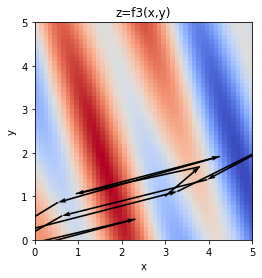

In [29]:
#Too large of an alpha
xvalues=np.arange(0,5,0.1)
yvalues=np.arange(0,5,0.1)

def dg(x,y):
  return ((np.cos(x)+(-3)*np.sin(3*x+y)),(-1)*np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x,y=x+alpha*dg(x,y)[0],y+alpha*dg(x,y)[1]
    
  return (x,y)

ax=plt.axes(xlim=[0,5], ylim=[0,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ascent(3,1,dg,1.25,30)

ax.imshow(z, cmap='coolwarm', origin='lower', extent=(0,5,0,5))

## Q4 

* What determines which maximum a gradient ascent will approach (assuming a reasonable choice of $\alpha$)?  Can you give examples of two nearby points that approach two different maximums?



The x and y value determines which maximum a gradient ascent will approach. The functions we are using are trig functions, meaning that they are oscillating. Thus, different initial x and y values may have different cycles that will approach different maximums. In the graph below, we see that by changing the x value and keeping alpha, y, and n constant, will make it so that the gradient ascent approaches a different maximum for x=3.5 and x=3.0. 

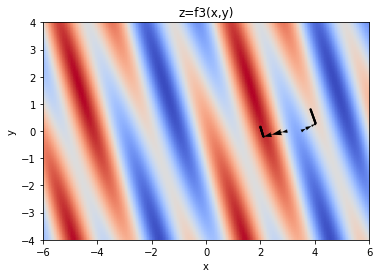

In [42]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,-4,0.1)
def dg(x,y):
  return ((np.cos(x)+(-3)*np.sin(3*x+y)),(-1)*np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x,y=x+alpha*dg(x,y)[0],y+alpha*dg(x,y)[1]
    
  return (x,y)

ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ascent(3,0,dg,0.1,30)
ascent(3.5,0,dg,0.1,30)
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-4,4))


## Q5

* How would you modify gradient ascent to find a local minimum instead?  
* Demonstrate.



In order to make the gradient ascent find a local minimum, we must change the sign of alpha to negative. Instead of adding -alpha*dg(x,y)[0]/[1] to the starting points to get the terminal points, we subtract them from the starting points to get the terminal points. Subtracting will give us the local minimum instead of the local maximum

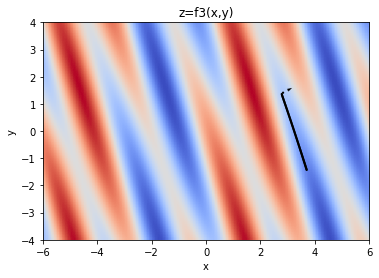

In [46]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,-4,0.1)

def dg(x,y):
  return ((np.cos(x)+(-3)*np.sin(3*x+y)),(-1)*np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x,y=x-alpha*dg(x,y)[0],y-alpha*dg(x,y)[1]
    
  return (x,y)

ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ascent(3,1.5,dg,0.1,100)

ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-4,4))

## Optional (Programming)

Suppose we have only discreet values of our function.  Say it can only be evaluated at whole tenths of $x$ and $y$ (so (3.1,4) would work but (3.12,7) would not).  Can you reprogram gradient ascent to successfully approximate the necessary derivatives?

In [ ]:
def g(x,y)
  if 10*floor(x)==floor(10*x) and 10*floor(y)==floor(10*y):
    return 16-x**2-y**4
  else:
    print("I can't evaluate the function here")
    return None


SyntaxError: ignored